In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("russia_losses_personnel.csv")

In [3]:
data.info()
data.rename(columns={"personnel": "cumulativeloss"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        367 non-null    object 
 1   day         367 non-null    int64  
 2   personnel   367 non-null    int64  
 3   personnel*  367 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 14.5+ KB


In [4]:
data.describe()

,day,cumulativeloss,POW
count,367.000000,367.000000,62.000000
mean,185.000000,59215.547684,386.387097
std,106.088014,37999.105268,131.440363
min,2.000000,2800.000000,0.000000
25%,93.500000,29875.000000,389.000000
50%,185.000000,46500.000000,421.000000
75%,276.500000,87010.000000,474.500000
max,368.000000,148130.000000,496.000000


In [5]:
data.head()

,date,day,cumulativeloss,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [6]:
data.sort_values(by=['day'])

,date,day,cumulativeloss,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
362,2023-02-22,364,145060,about,NaN
363,2023-02-23,365,145850,about,NaN
364,2023-02-24,366,146820,about,NaN
365,2023-02-25,367,147470,about,NaN


In [7]:
data = data[['date', 'cumulativeloss', 'day']]

In [8]:
data.head()

,date,cumulativeloss,day
0,2022-02-25,2800,2
1,2022-02-26,4300,3
2,2022-02-27,4500,4
3,2022-02-28,5300,5
4,2022-03-01,5710,6


In [9]:
data['dayilyloss'] = data['cumulativeloss'].diff()
data.at[0, 'dayilyloss'] = 0

In [10]:
data.head()

,date,cumulativeloss,day,dayilyloss
0,2022-02-25,2800,2,0.0
1,2022-02-26,4300,3,1500.0
2,2022-02-27,4500,4,200.0
3,2022-02-28,5300,5,800.0
4,2022-03-01,5710,6,410.0


In [11]:
data.loc[(data['day'] > data['day'] - 7),  'cumulativeloss'] #.sum()

0        2800
1        4300
2        4500
3        5300
4        5710
        ...  
362    145060
363    145850
364    146820
365    147470
366    148130
Name: cumulativeloss, Length: 367, dtype: int64

In [12]:
def rollup(a, B=data):
    # print(a)
    # print(B[(B['day'] > a - 7) & (B['day'] <= a)]['dayilyloss'].sum() )
    # ix = a.index.max()
    # b = B[ix]
    return B[(B['day'] > a - 7) & (B['day'] <= a)]['dayilyloss'].sum()

data['weeklyloss'] = data.day.apply(rollup)

In [13]:
data

,date,cumulativeloss,day,dayilyloss,weeklyloss
0,2022-02-25,2800,2,0.0,0.0
1,2022-02-26,4300,3,1500.0,1500.0
2,2022-02-27,4500,4,200.0,1700.0
3,2022-02-28,5300,5,800.0,2500.0
4,2022-03-01,5710,6,410.0,2910.0
...,...,...,...,...,...
362,2023-02-22,145060,364,620.0,5290.0
363,2023-02-23,145850,365,790.0,5390.0
364,2023-02-24,146820,366,970.0,5560.0
365,2023-02-25,147470,367,650.0,5200.0


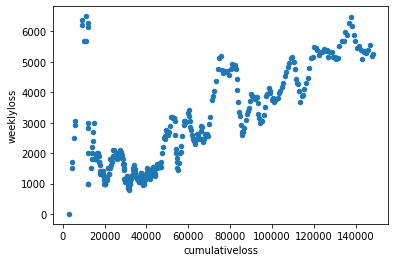

In [14]:
ax1 = data.plot.scatter(x = 'cumulativeloss', y = 'weeklyloss')

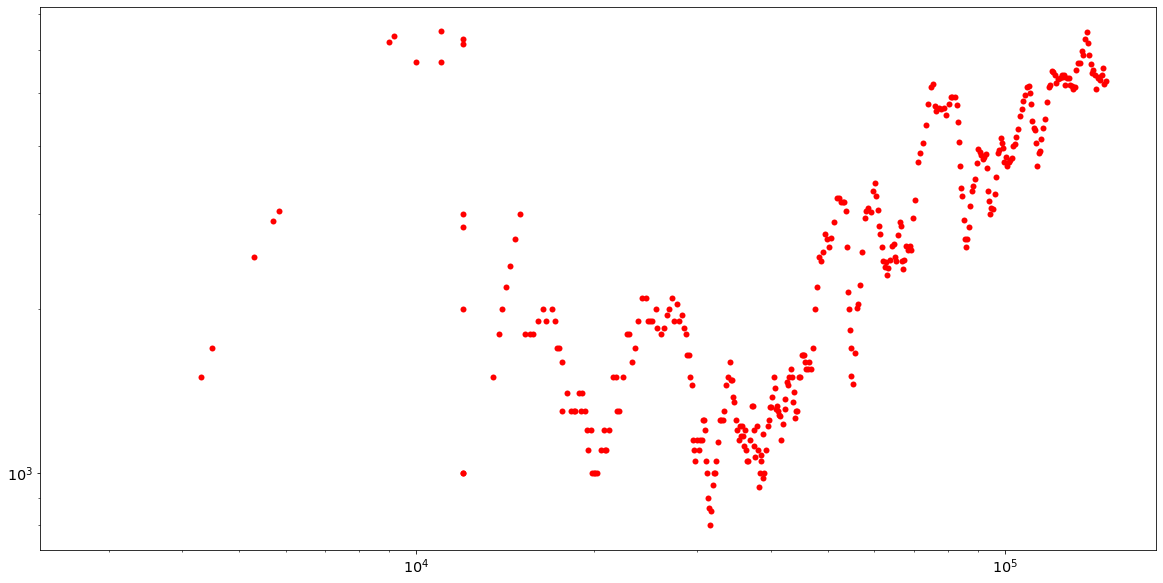

In [15]:
# plt.rcParams['figure.figsize'] = [20, 10]

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


fig = plt.figure()
ax = plt.gca()
ax.plot(data['cumulativeloss'] ,data['weeklyloss'], 'o', c='red', alpha=1.0, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')


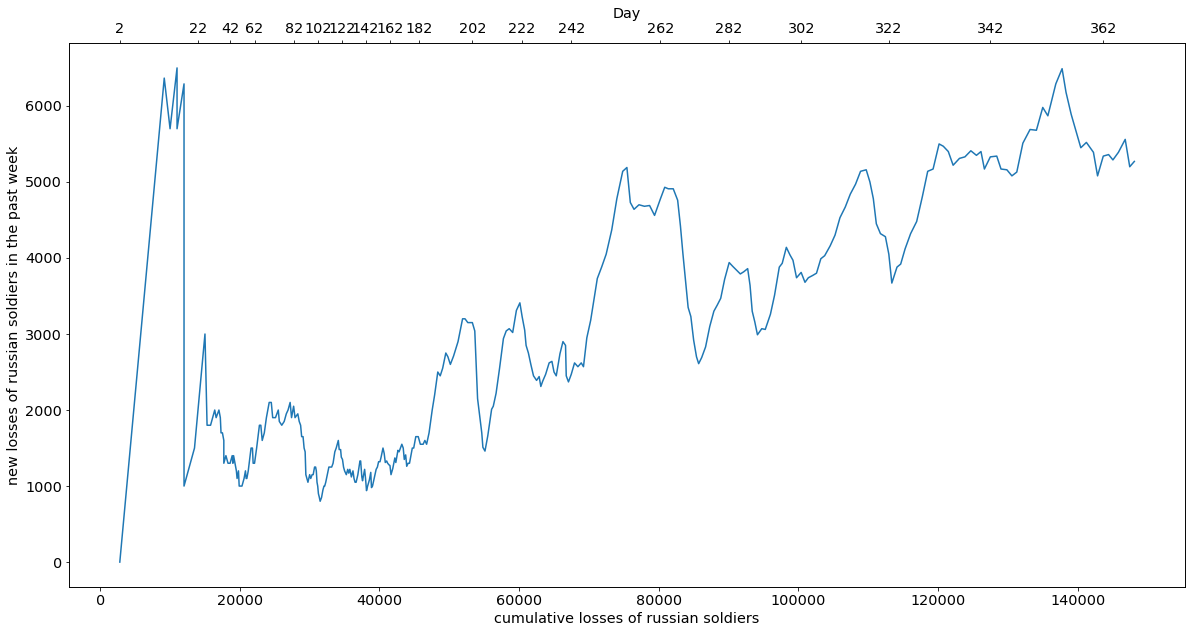

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data['cumulativeloss']
Y = data['weeklyloss']

ax1.plot(X,Y)
ax1.set_xlabel(r"cumulative losses of russian soldiers")
ax1.set_ylabel(r"new losses of russian soldiers in the past week")

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(data[data.index % 20 == 0]['cumulativeloss'])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
ax2.set_xlabel(r"Day")
plt.show()

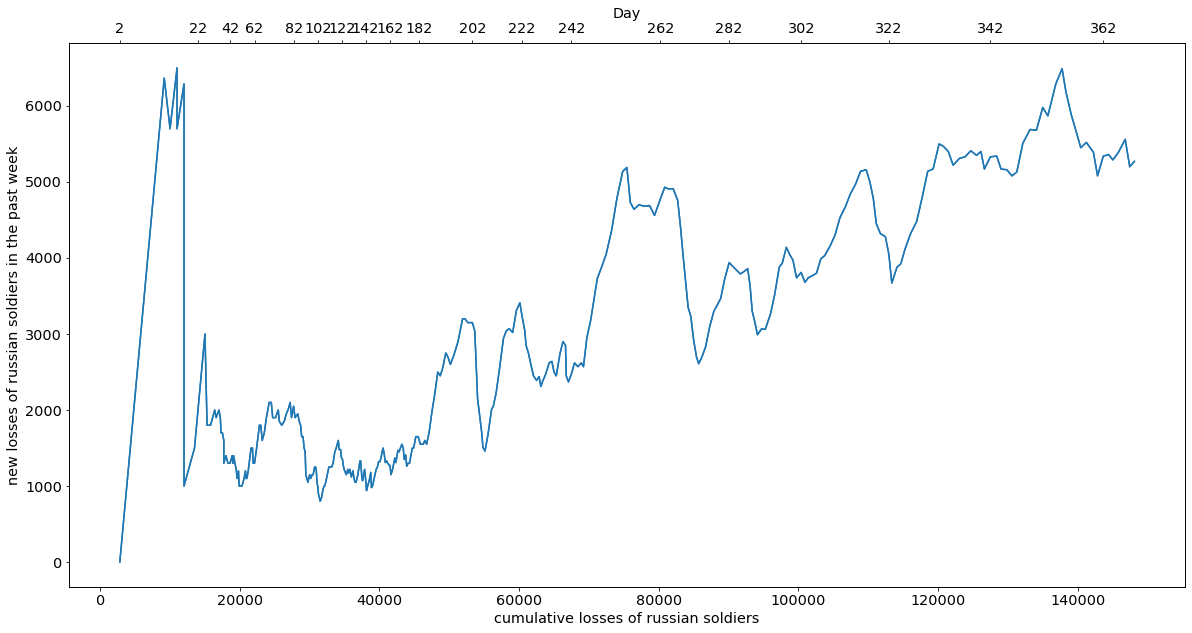

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data['cumulativeloss']
Y = data['weeklyloss']

ax1.plot(X, Y)
ax2.plot(X, Y) # Create a dummy plot
ax1.set_xlabel(r"cumulative losses of russian soldiers")
ax1.set_ylabel(r"new losses of russian soldiers in the past week")

ax2.set_xlabel(r"Day")


ax2.set_xticks(data[data.index % 20 == 0]['cumulativeloss'])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
# ax2.cla()
plt.show()

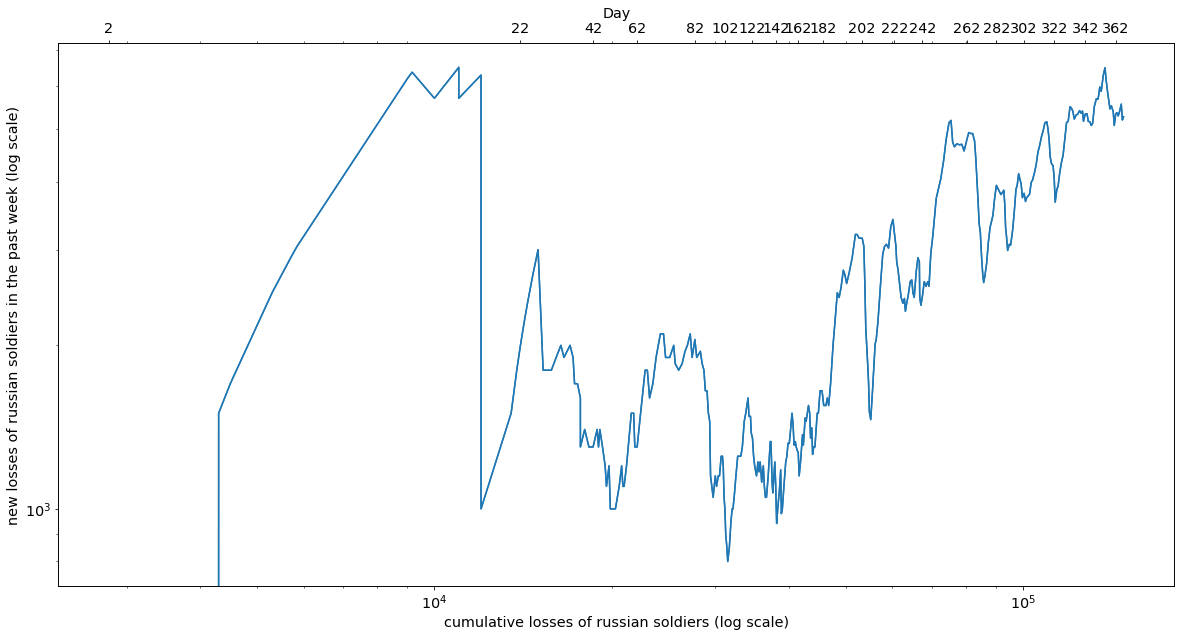

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = data['cumulativeloss']
Y = data['weeklyloss']

ax1.plot(X, Y)
ax2.plot(X, Y) # Create a dummy plot
ax1.set_xlabel(r"cumulative losses of russian soldiers (log scale)")
ax1.set_ylabel(r"new losses of russian soldiers in the past week (log scale)")

ax2.set_xlabel(r"Day")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xticks(data[data.index % 20 == 0]['cumulativeloss'])
ax2.set_xticklabels(data[data.index % 20 == 0]['day'])
# ax2.cla()
plt.show()